In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [22]:
df1 = pd.read_csv('May.csv', delimiter=';', encoding='cp1252' , header=0, skiprows=[1] , index_col=[0])
df2 = pd.read_csv('June.csv', delimiter=';', encoding='cp1252' , header=0, skiprows=[1] , index_col=[0])
df3 = pd.read_csv('July.csv', delimiter=';', encoding='cp1252', header=0, skiprows=[1] , index_col=[0])
df4 = pd.read_csv('August.csv', delimiter=';', encoding='cp1252', header=0, skiprows=[1] , index_col=[0])
df5 = pd.read_csv('September.csv', delimiter=';', encoding='cp1252', header=0, skiprows=[1] , index_col=[0])
df6 = pd.read_csv('October.csv', delimiter=';', encoding='cp1252', header=0, skiprows=[1] , index_col=[0])

In [23]:
dataframes = [df1, df2, df3, df4, df5, df6]

# Concatenate the DataFrames along the rows (axis=0)
df = pd.concat(dataframes, axis=0, ignore_index=True)

df = df.drop(columns='_id')

In [24]:
df.replace("ERROR", np.nan, inplace=True)

# Mill Normal Operation

<AxesSubplot: xlabel='mill_motor_pwr_kw_pv', ylabel='Density'>

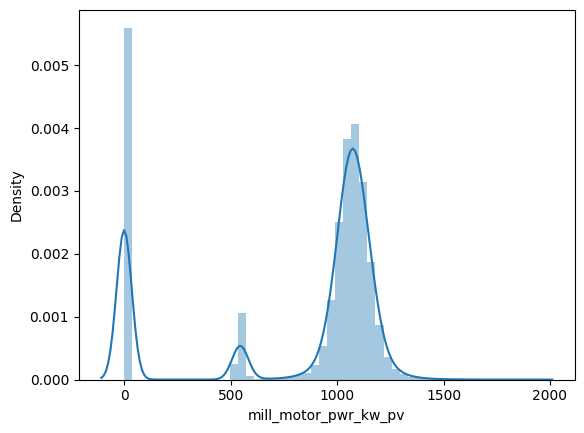

In [25]:
df['mill_motor_pwr_kw_pv'].value_counts()
df['mill_motor_pwr_kw_pv'].dtype
df[df['mill_motor_pwr_kw_pv'] == 'ERROR']['mill_operation'].value_counts()
df['mill_motor_pwr_kw_pv'].replace({'ERROR' : 0}, inplace = True)
df['mill_motor_pwr_kw_pv'] = df['mill_motor_pwr_kw_pv'].astype(float)
sns.distplot(df['mill_motor_pwr_kw_pv'])

<AxesSubplot: xlabel='mill_motor_pwr_kw_pv', ylabel='Density'>

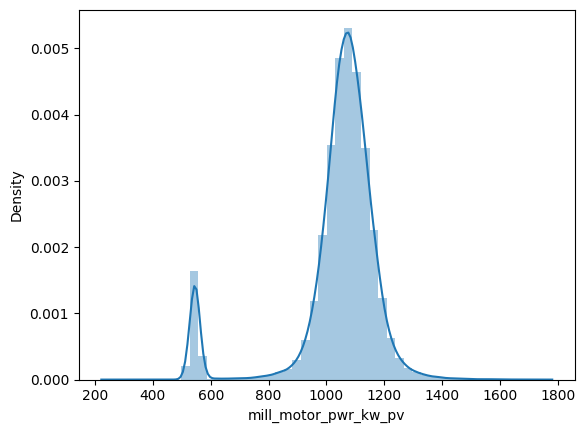

In [26]:
df = df[(df['mill_motor_pwr_kw_pv'] > 250) & (df['mill_motor_pwr_kw_pv'] < 1750)]
df = df.reset_index(drop=True)

sns.distplot(df['mill_motor_pwr_kw_pv'])

In [27]:
(df['mill_motor_pwr_kw_pv'].dtype , df['mill_motor_pwr_kw_pv'].isna().sum())

(dtype('float64'), 0)

# Datetime Format

In [28]:
# Import the 're' module for working with regular expressions
import re

# Retrieve the 'date' values from 'august' DataFrame where the value does not start with '2019'
date1 = df[~df['date'].str.startswith('2019')]['date']

# Retrieve the 'date' values from 'august' DataFrame where the value starts with '2019'
date2 = df[df['date'].str.startswith('2019')]['date']

# Randomly sample 20 values from 'date1'
date1.sample(20)

56315       1/7/2019 7:42
25558      24/5/2019 6:30
14066     17/5/2019 14:20
135294    10/8/2019 12:48
102891     29/7/2019 3:30
39231      4/6/2019 16:58
120493     4/8/2019 13:44
141992    12/8/2019 22:01
219197    14/9/2019 14:20
97329      27/7/2019 4:45
123582     5/8/2019 15:52
129888     7/8/2019 21:54
18513      19/5/2019 9:27
211415    11/9/2019 19:04
88183     18/7/2019 19:07
229141     18/9/2019 2:52
141853    12/8/2019 20:51
115973     2/8/2019 23:40
133781     10/8/2019 0:06
113453      2/8/2019 1:11
Name: date, dtype: object

In [29]:
# Modify the 'date1' values by adding a leading '0' to the hour component if it's missing
date1 = date1.apply(lambda s: re.sub(r'(\d{1,2}\/\d{1}\/\d{4})\s(\d{1}:\d{2})', r'\1 0\2', s))

# Add a leading '0' to the 'date1' values if they match a specific date and time format
date1 = date1.apply(lambda s: '0' + s[0:] if re.match('\d{1}\/\d{1}\/\d{4}\s\d{2}:\d{2}', s) else s)

# Modify the 'date1' values by adding a leading '0' to the day component if it's missing
date1 = date1.apply(lambda s: s[0:3] + '0' + s[3:] if re.match('\d{2}\/\d{1}\/\d{4}\s\d{2}:\d{2}', s) else s)

# Convert the modified 'date1' values to datetime format with the specified format '%d/%m/%Y %H:%M'
date1 = pd.to_datetime(date1, format='%d/%m/%Y %H:%M')
date2 = pd.to_datetime(date2,format='%Y-%m-%d %H:%M:%S.%f')
df['date'] = pd.concat([date1,date2])
df = df.sort_values('date')


# Handling Separator Motor ERRORS and Missing Values

<AxesSubplot: xlabel='separator_pwr_kw_pv', ylabel='Density'>

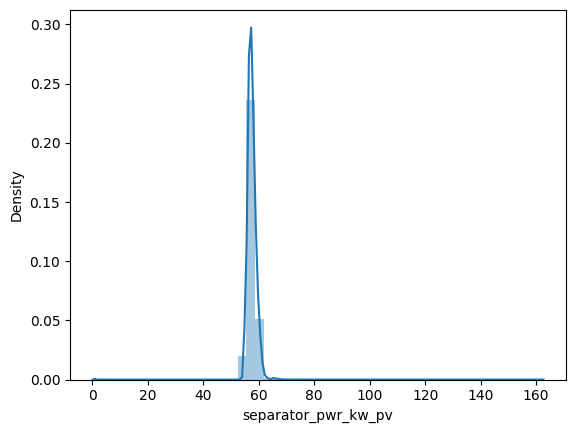

In [30]:
df['separator_pwr_kw_pv'].dtype

#missing values
df['separator_pwr_kw_pv'].isna().sum()

#errors
(df['separator_pwr_kw_pv'] == 'ERROR').sum()
df['separator_pwr_kw_pv'] = df['separator_pwr_kw_pv'].replace({'ERROR' : np.NaN})
df['separator_pwr_kw_pv'] = df['separator_pwr_kw_pv'].astype(float)
df['separator_pwr_kw_pv'] = df['separator_pwr_kw_pv'].interpolate()
df['separator_pwr_kw_pv'].isna().sum()
sns.distplot(df['separator_pwr_kw_pv'])

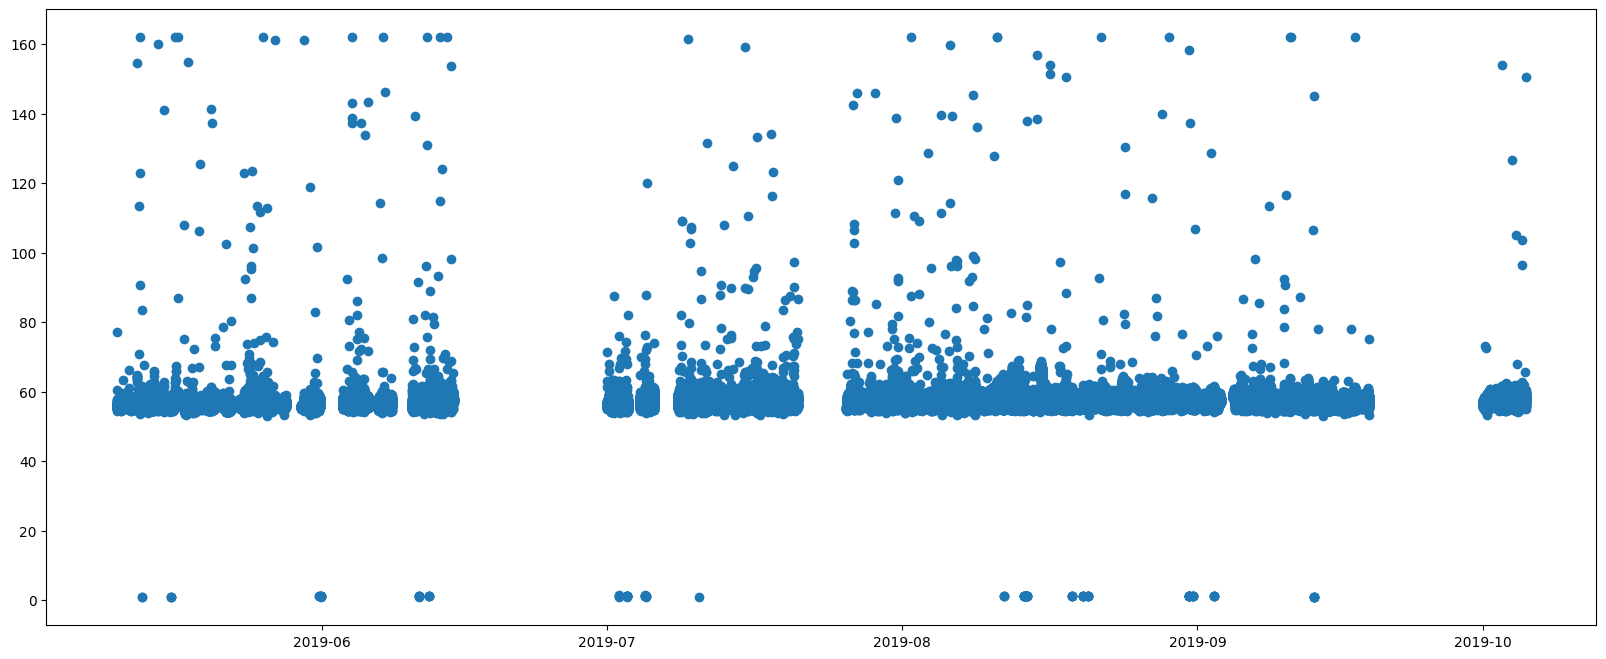

In [31]:
plt.figure(figsize = (20,8))

plt.scatter(df['date'],df['separator_pwr_kw_pv'])

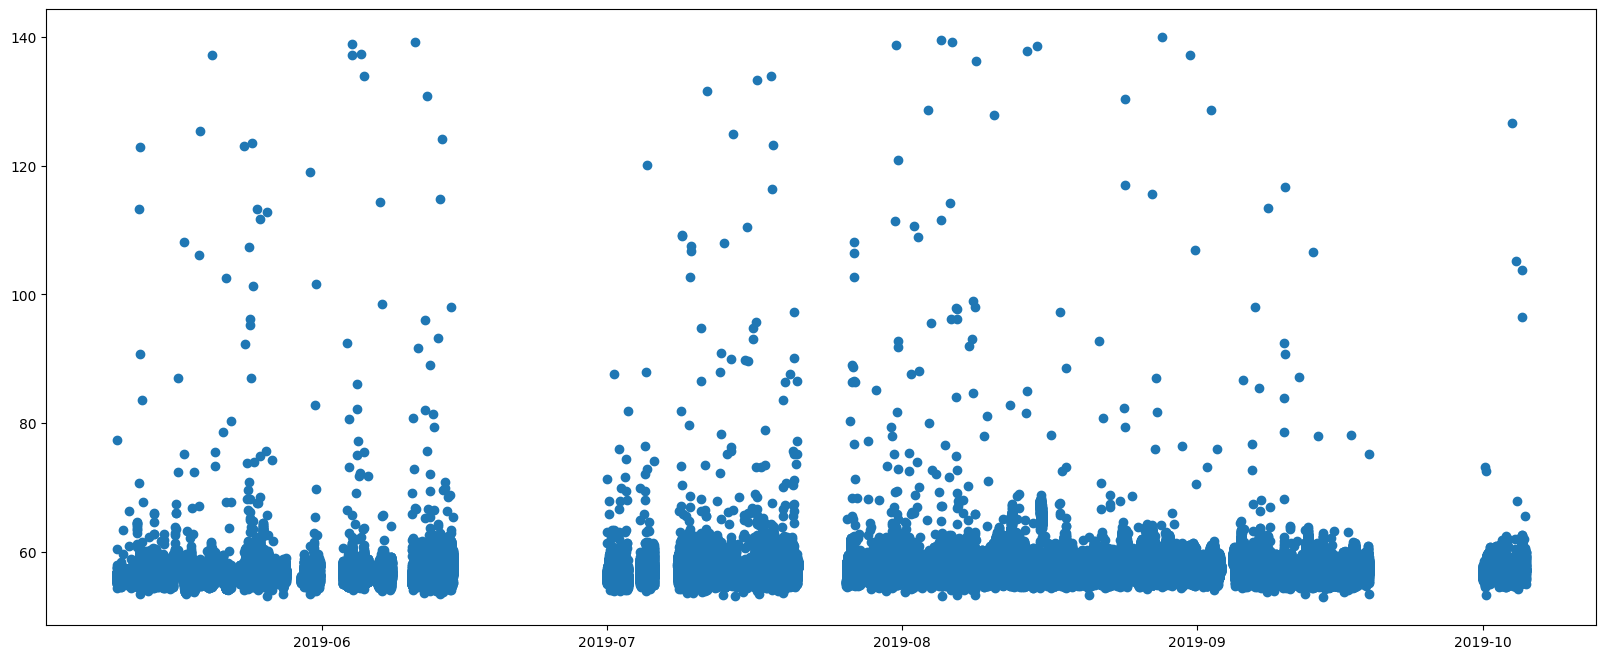

In [32]:
df[df['separator_pwr_kw_pv'] < 40]['separator_pwr_kw_pv'].count()
df['separator_pwr_kw_pv'] = df['separator_pwr_kw_pv'].apply(lambda x: np.NaN if x < 40 or x > 140 else x)
df['separator_pwr_kw_pv'] = df['separator_pwr_kw_pv'].interpolate(method='linear')
plt.figure(figsize = (20,8))

plt.scatter(df['date'],df['separator_pwr_kw_pv'])

In [33]:
(df['separator_pwr_kw_pv'].dtypes , df['separator_pwr_kw_pv'].isna().sum())

(dtype('float64'), 0)

# Separator Speed , Mill DP Handling Missing Values and ERRORS

**Separator Speed**

<AxesSubplot: xlabel='separator_speed_rpm_pv', ylabel='Density'>

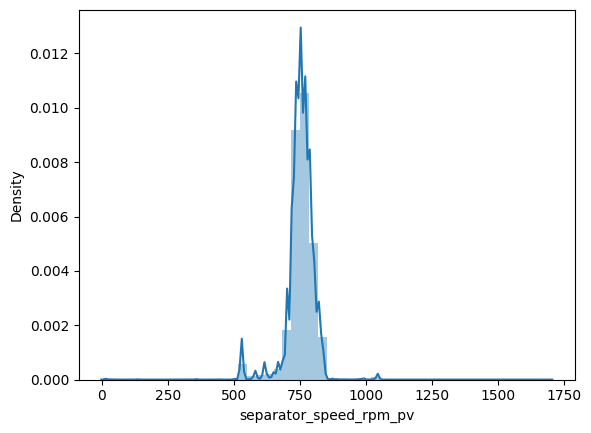

In [34]:
df['separator_speed_rpm_pv'].dtype
(df['separator_speed_rpm_pv'] == 'ERROR').sum()
df['separator_speed_rpm_pv'].replace({'ERROR' : np.NaN},inplace=True)
df['separator_speed_rpm_pv'] = df['separator_speed_rpm_pv'].astype(float)
df['separator_speed_rpm_pv'].isna().sum()
df['separator_speed_rpm_pv'] = df['separator_speed_rpm_pv'].interpolate()
sns.distplot(df['separator_speed_rpm_pv'])

In [35]:
(df['separator_speed_rpm_pv'].dtypes , df['separator_speed_rpm_pv'].isna().sum())

(dtype('float64'), 0)

**Mill DP**

<AxesSubplot: xlabel='mill_dp_mbar_pv', ylabel='Density'>

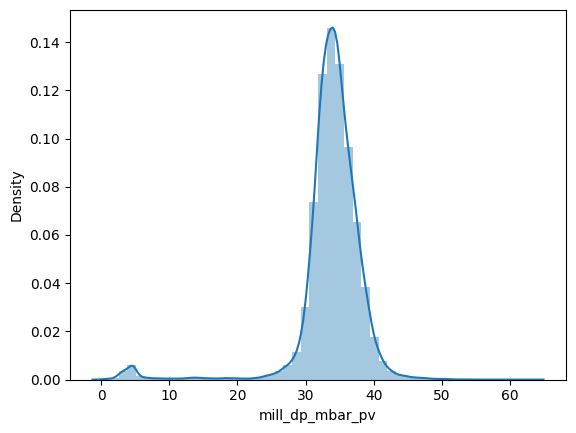

In [36]:
df['mill_dp_mbar_pv'].dtype
df['mill_dp_mbar_pv'].isna().sum() 
df['mill_dp_mbar_pv'].replace({'ERROR' : np.NaN},inplace=True)
df['mill_dp_mbar_pv'] = df['mill_dp_mbar_pv'].astype(float)
df['mill_dp_mbar_pv'] = df['mill_dp_mbar_pv'].interpolate()
sns.distplot(df['mill_dp_mbar_pv'])

In [37]:
(df['mill_dp_mbar_pv'].dtypes , df['mill_dp_mbar_pv'].isna().sum())

(dtype('float64'), 0)

In [38]:
df.corr()

,mill_motor_pwr_kw_pv,mill_dp_mbar_pv,separator_pwr_kw_pv,separator_speed_rpm_pv,blaine_cm3_g_pv,total_feed_ton_h_pv,clinker_ton_h_pv,limestone_ton_h_pv,slag_ton_h_pv,gypsum_ton_h_pv,...,gearbox_1_vibration_mm_s_pv,gearbox_2_vibration_mm_s_pv,hopper_level_mg_m3_pv,grinding_aid_l_h_pv,grinding_aid_perc_sp,fan_speed_perc_pv,fan_speed_perc_sp,bf_dp_mbar_sp,is_enable_sp,is_clicked_sp
mill_motor_pwr_kw_pv,1.000000,0.537087,0.248986,0.348933,0.018848,0.710125,0.593793,0.294061,0.123954,0.424592,...,0.534295,0.597843,0.104768,0.231456,0.048190,0.310313,0.181532,0.160066,0.295069,0.252891
mill_dp_mbar_pv,0.537087,1.000000,0.339031,0.263095,-0.017906,0.380345,0.328417,0.152594,0.255232,0.440435,...,0.260820,0.330916,-0.028141,0.166554,-0.030287,-0.151482,0.476915,0.081288,0.170271,0.149391
separator_pwr_kw_pv,0.248986,0.339031,1.000000,0.315794,-0.035147,0.073626,0.000394,0.021883,0.304069,0.338380,...,0.076677,0.145598,-0.148262,0.081676,-0.100314,0.266445,0.146698,-0.102169,0.039434,0.034674
separator_speed_rpm_pv,0.348933,0.263095,0.315794,1.000000,-0.069638,-0.035411,-0.123968,0.046601,0.332375,0.333738,...,0.053259,0.115703,-0.172955,0.042294,-0.205495,0.344102,-0.034496,-0.043836,0.012693,0.055215
blaine_cm3_g_pv,0.018848,-0.017906,-0.035147,-0.069638,1.000000,0.177222,0.168719,0.124732,-0.257377,-0.118068,...,0.091155,0.065661,-0.036074,0.099645,-0.073753,-0.036285,-0.043732,0.244215,0.091570,0.124089
total_feed_ton_h_pv,0.710125,0.380345,0.073626,-0.035411,0.177222,1.000000,0.916619,0.227224,-0.262474,0.195740,...,0.494496,0.486346,0.174636,0.291522,0.071602,-0.149350,0.263767,0.499874,0.346490,0.284971
clinker_ton_h_pv,0.593793,0.328417,0.000394,-0.123968,0.168719,0.916619,1.000000,0.040412,-0.471359,-0.038592,...,0.486818,0.438623,0.213350,0.273311,0.128086,-0.164011,0.318197,0.503946,0.317174,0.234288
limestone_ton_h_pv,0.294061,0.152594,0.021883,0.046601,0.124732,0.227224,0.040412,1.000000,0.170956,0.352651,...,0.226736,0.312951,-0.081613,0.049516,-0.114369,-0.127583,-0.277001,-0.005650,0.128565,0.152764
slag_ton_h_pv,0.123954,0.255232,0.304069,0.332375,-0.257377,-0.262474,-0.471359,0.170956,1.000000,0.820641,...,-0.168270,-0.025086,-0.193747,0.034843,-0.003792,-0.123086,0.106076,-0.558611,-0.105650,-0.075789
gypsum_ton_h_pv,0.424592,0.440435,0.338380,0.333738,-0.118068,0.195740,-0.038592,0.352651,0.820641,1.000000,...,0.077575,0.213816,-0.168207,0.157024,-0.043584,-0.162569,0.169509,-0.243768,0.038550,0.067966


In [39]:
df.shape

(242550, 130)

In [40]:
# Maybe we should examine and gypsum_ton_h_pv
df['gypsum_ton_h_pv'].isna().sum()
# df['gypsum_ton_h_pv'].describe()

62107

In [41]:
df['gypsum_ton_h_sp'].isna().sum()

62113

In [42]:
df['slag_ton_h_pv'].isna().sum()
df['slag_ton_h_pv'].describe()

count    180441.000000
mean          5.933232
std           9.742941
min           0.000000
25%           0.000000
50%           0.000000
75%          19.450000
max          47.180000
Name: slag_ton_h_pv, dtype: float64

# Statistics - Diagramms

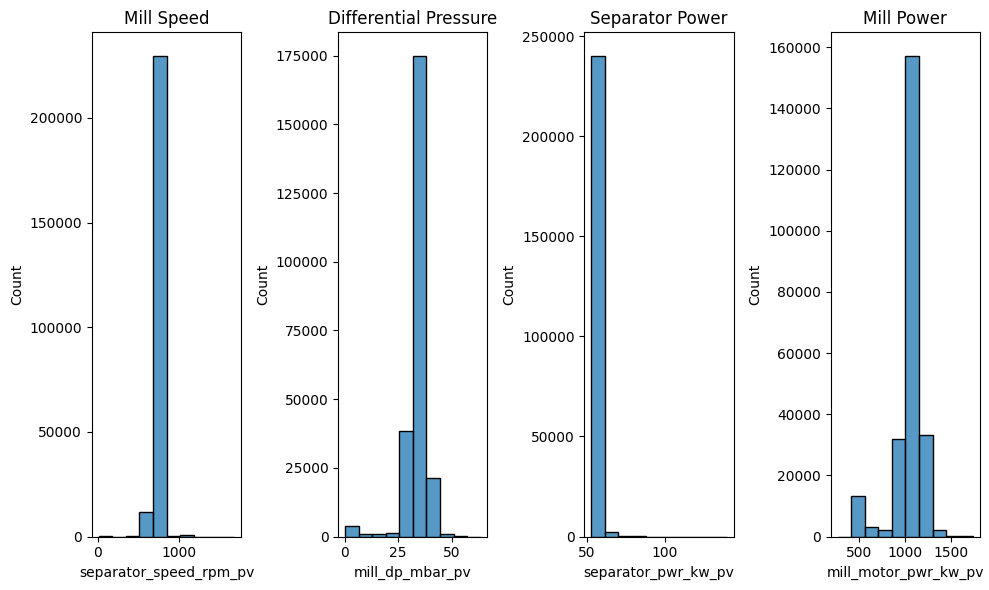

In [43]:
# Create separate histograms for each variable
plt.figure(figsize=(10, 6))

plt.subplot(1, 4, 1)
sns.histplot(data=df, x='separator_speed_rpm_pv', bins=10)
plt.title('Mill Speed')

plt.subplot(1, 4, 2)
sns.histplot(data=df, x='mill_dp_mbar_pv', bins=10)
plt.title('Differential Pressure')

plt.subplot(1, 4, 3)
sns.histplot(data=df, x='separator_pwr_kw_pv', bins=10)
plt.title('Separator Power')

plt.subplot(1, 4, 4)
sns.histplot(data=df, x='mill_motor_pwr_kw_pv', bins=10)
plt.title('Mill Power')

plt.tight_layout()
plt.show()

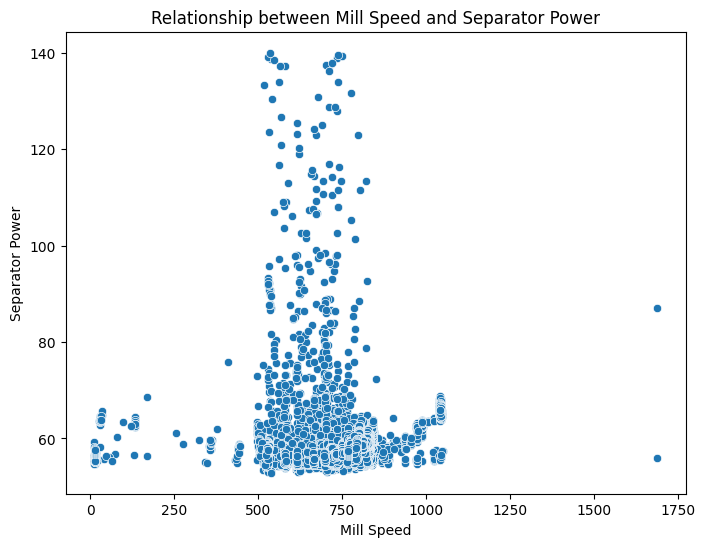

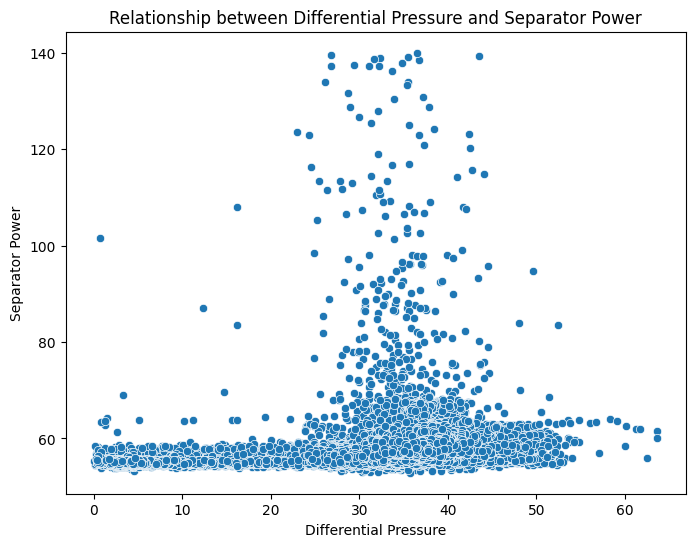

In [44]:
# Create a scatter plot between 'mill_speed' and 'separator_power'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='separator_speed_rpm_pv', y='separator_pwr_kw_pv')
plt.xlabel('Mill Speed')
plt.ylabel('Separator Power')
plt.title('Relationship between Mill Speed and Separator Power')
plt.show()

# Create a scatter plot between 'differential_pressure' and 'separator_power'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='mill_dp_mbar_pv', y='separator_pwr_kw_pv')
plt.xlabel('Differential Pressure')
plt.ylabel('Separator Power')
plt.title('Relationship between Differential Pressure and Separator Power')
plt.show()

#  Inputs And Outputs for Mill Differential Pressure Block

In [45]:
df[['total_feed_ton/h_pv','total_feed_ton/h_sp']]

,total_feed_ton/h_pv,total_feed_ton/h_sp
0,85.82,85.0
1,85.5,85.0
2,57.92,83.0
3,57.72,83.0
4,58.01,83.0
...,...,...
242545,NaN,NaN
242546,NaN,NaN
242547,NaN,NaN
242548,NaN,NaN


In [46]:
df[['total_feed_ton/h_pv','total_feed_ton/h_sp']]

df[['fly_ash_1_perc_pv','fly_ash_1_perc_sp','fly_ash_1_ton/h_pv','fly_ash_1_ton/h_sp']]

df[['fly_ash_2_perc_pv','fly_ash_2_perc_sp','fly_ash_2_ton/h_pv','fly_ash_2_ton/h_sp']].sample(30)

df['main_fan_speed_rpm_pv']

df['separator_speed_rpm_pv']

df[['grinding_pressure_bar_sp','grinding_pressure_bar_pv']]

df[['mill_injection_water_m3/h_pv','mill_injection_water_perc_sp']]

df['bucket_elv_mtr_pwr_kw_pv']

0         4.88
1         4.83
2         4.82
3         4.85
4         4.88
          ... 
242545    4.82
242546    4.87
242547    4.82
242548    4.81
242549    4.81
Name: bucket_elv_mtr_pwr_kw_pv, Length: 242550, dtype: object

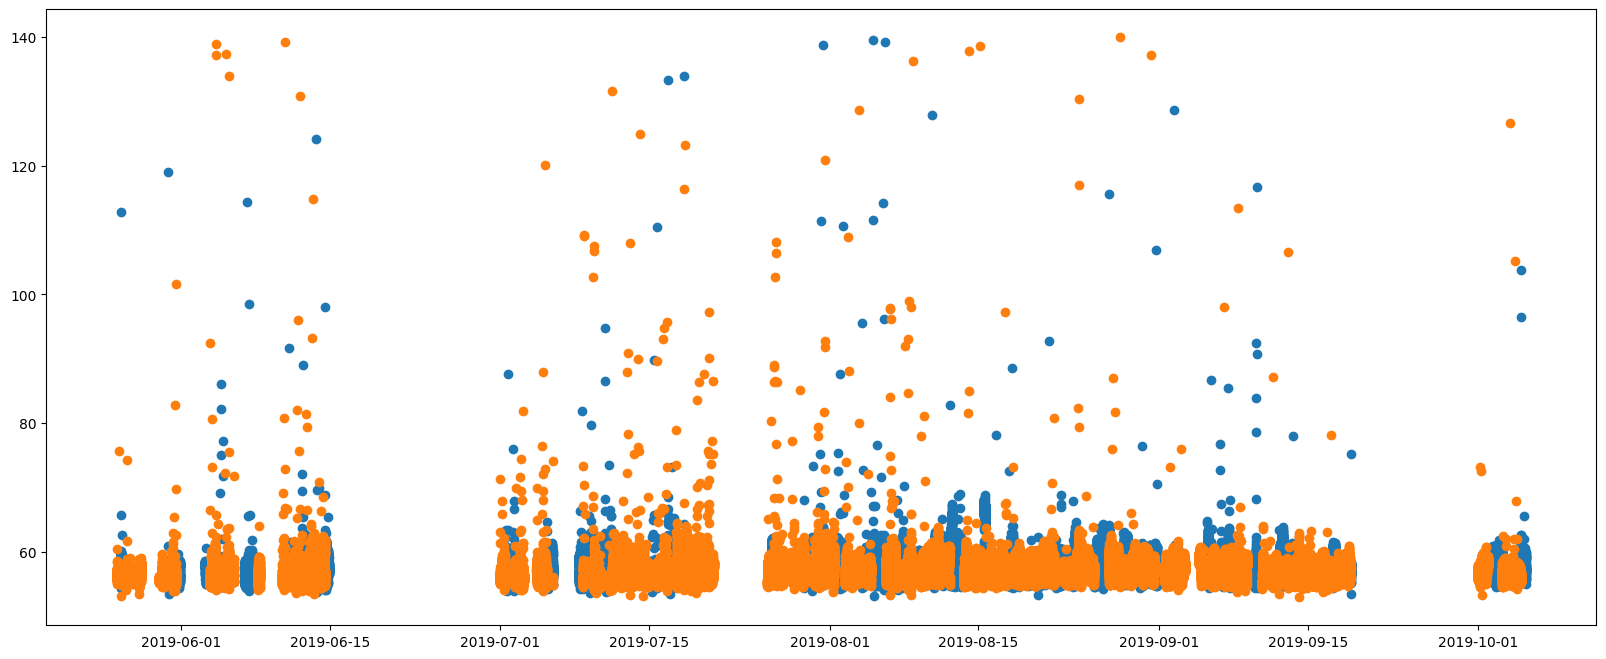

In [47]:
plt.figure(figsize=(20,8))

plt.scatter(df[df['cement_type_cpii_bool_pv'] == 1]['date'],df[df['cement_type_cpii_bool_pv'] == 1]['separator_pwr_kw_pv'])
plt.scatter(df[df['cement_type_cpii_bool_pv'] == 0]['date'],df[df['cement_type_cpii_bool_pv'] == 0]['separator_pwr_kw_pv'])

In [48]:
df[['separator_speed_rpm_pv','mill_dp_mbar_pv','separator_pwr_kw_pv','cement_type_cpii_bool_pv','cement_type_cpiv_bool_pv']]

,separator_speed_rpm_pv,mill_dp_mbar_pv,separator_pwr_kw_pv,cement_type_cpii_bool_pv,cement_type_cpiv_bool_pv
0,747.14,31.17,56.13,0.0,1.0
1,746.87,31.37,56.83,0.0,1.0
2,717.51,29.79,60.41,0.0,1.0
3,735.89,30.51,55.76,0.0,1.0
4,736.68,31.61,55.89,0.0,1.0
...,...,...,...,...,...
242545,767.68,32.83,57.76,1.0,0.0
242546,768.10,32.91,57.00,1.0,0.0
242547,769.11,33.65,57.14,1.0,0.0
242548,769.27,35.03,57.44,1.0,0.0


<AxesSubplot: >

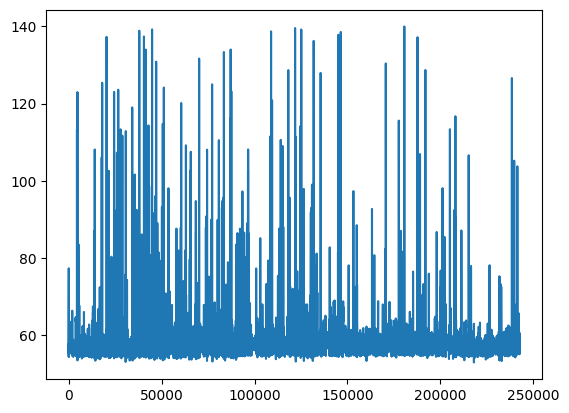

In [49]:
df['separator_pwr_kw_pv'].plot()

# Exploring Diversing Values

Text(0.5, 1.0, 'Separator Motor Distribution for Mill DP > 15 mBar')

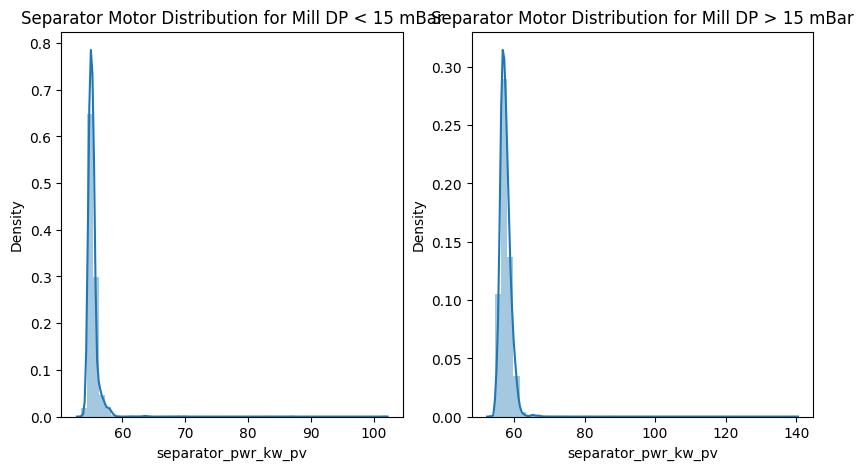

In [50]:
plt.figure(figsize=(15,5))

plt.subplot(131)
sns.distplot(df[df['mill_dp_mbar_pv'] < 15]['separator_pwr_kw_pv'])
plt.title('Separator Motor Distribution for Mill DP < 15 mBar')

plt.subplot(132)
sns.distplot(df[df['mill_dp_mbar_pv'] > 15]['separator_pwr_kw_pv'])
plt.title('Separator Motor Distribution for Mill DP > 15 mBar')

Text(0.5, 1.0, 'Mill Motor Distribution for Mill DP > 15 mBar')

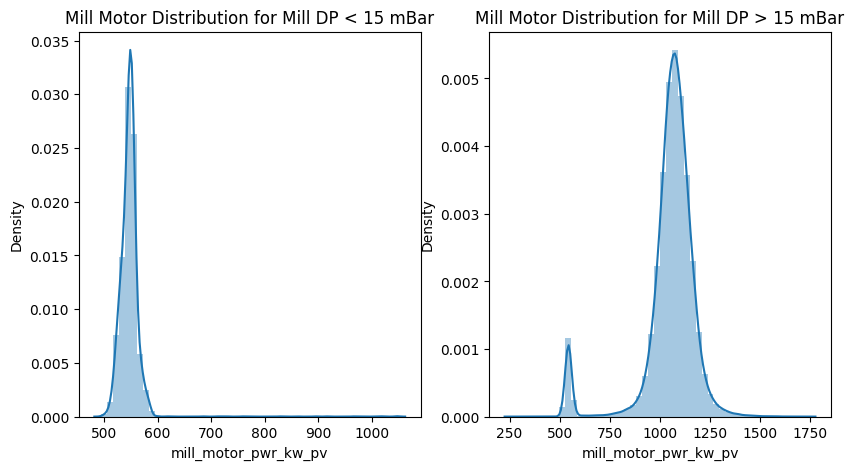

In [51]:
plt.figure(figsize=(15,5))

plt.subplot(131)
sns.distplot(df[df['mill_dp_mbar_pv'] < 15]['mill_motor_pwr_kw_pv'])
plt.title('Mill Motor Distribution for Mill DP < 15 mBar')

plt.subplot(132)
sns.distplot(df[df['mill_dp_mbar_pv'] > 15]['mill_motor_pwr_kw_pv'])
plt.title('Mill Motor Distribution for Mill DP > 15 mBar')

Text(0.5, 1.0, 'Mill Motor Distribution for CPIV')

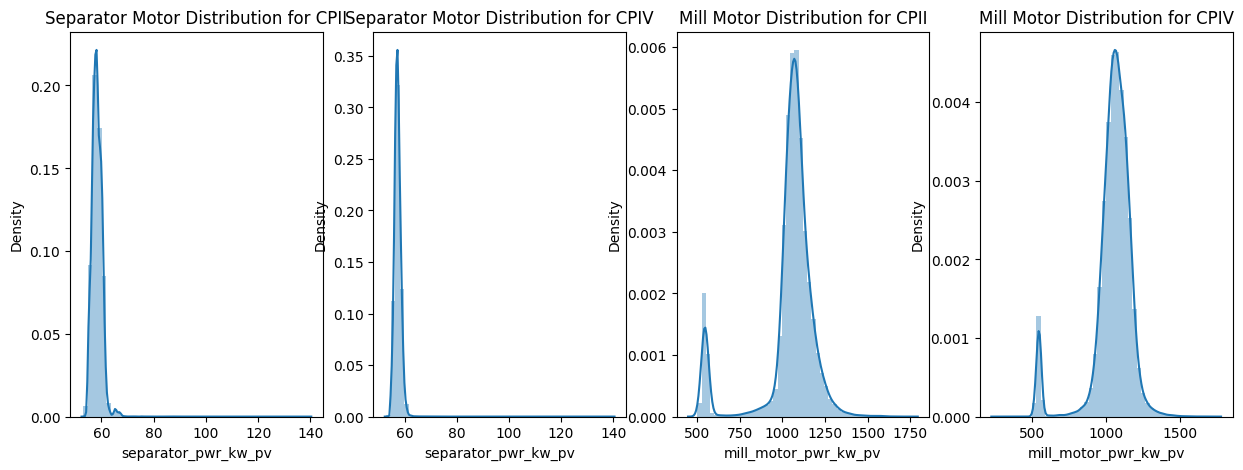

In [52]:
plt.figure(figsize=(15,5))

plt.subplot(141)
sns.distplot(df[df['cement_type_cpii_bool_pv'] == 1]['separator_pwr_kw_pv'])
plt.title('Separator Motor Distribution for CPII')

plt.subplot(142)
sns.distplot(df[df['cement_type_cpii_bool_pv'] == 0]['separator_pwr_kw_pv'])
plt.title('Separator Motor Distribution for CPIV')

plt.subplot(143)
sns.distplot(df[df['cement_type_cpii_bool_pv'] == 1]['mill_motor_pwr_kw_pv'])
plt.title('Mill Motor Distribution for CPII')

plt.subplot(144)
sns.distplot(df[df['cement_type_cpii_bool_pv'] == 0]['mill_motor_pwr_kw_pv'])
plt.title('Mill Motor Distribution for CPIV')

**Possible Time Delay**

In [53]:
from scipy import signal
x = df['mill_dp_mbar_pv']
y = df['separator_pwr_kw_pv']
correlation = signal.correlate(x-np.mean(x), y - np.mean(y), mode="full")
lags = signal.correlation_lags(len(x), len(y), mode="full")
lag = lags[np.argmax(abs(correlation))]
lag

2

In [54]:
df[['separator_speed_rpm_pv','mill_dp_mbar_pv','separator_pwr_kw_pv','cement_type_cpii_bool_pv','cement_type_cpiv_bool_pv']]

,separator_speed_rpm_pv,mill_dp_mbar_pv,separator_pwr_kw_pv,cement_type_cpii_bool_pv,cement_type_cpiv_bool_pv
0,747.14,31.17,56.13,0.0,1.0
1,746.87,31.37,56.83,0.0,1.0
2,717.51,29.79,60.41,0.0,1.0
3,735.89,30.51,55.76,0.0,1.0
4,736.68,31.61,55.89,0.0,1.0
...,...,...,...,...,...
242545,767.68,32.83,57.76,1.0,0.0
242546,768.10,32.91,57.00,1.0,0.0
242547,769.11,33.65,57.14,1.0,0.0
242548,769.27,35.03,57.44,1.0,0.0


# Gypsum examination - as external factor

In [55]:
# print(df['gypsum_ton/h_pv'].isnull().sum())
# print(df['gypsum_ton_h_pv'].isnull().sum())
result1 = df[df['gypsum_ton/h_pv'].isnull() & df['gypsum_ton_h_pv'].isnull()]
result1
# Checking if they are rows that have a non-Nan value in the same rows
result2 = df[df['gypsum_ton/h_pv'].notnull() & df['gypsum_ton_h_pv'].notnull()].all(axis=1)
result2
# Combined Columns
df['gypsum_ton/h_pv_NEW'] = df['gypsum_ton/h_pv'].fillna(df['gypsum_ton_h_pv'])

df['gypsum_ton/h_pv_NEW'].isna().sum()
#removing the Nan values
# df = df.dropna(subset=['gypsum_ton/h_pv_NEW'])

4

In [56]:
error_count = (df['gypsum_ton/h_pv_NEW'] == 'ERROR').sum()
df['gypsum_ton/h_pv_NEW'] = df['gypsum_ton/h_pv_NEW'].replace('ERROR', np.nan)
df['gypsum_ton/h_pv_NEW'] = pd.to_numeric(df['gypsum_ton/h_pv_NEW'])
df['gypsum_ton/h_pv_NEW'] = df['gypsum_ton/h_pv_NEW'].fillna((df['gypsum_ton/h_pv_NEW'].shift() + df['gypsum_ton/h_pv_NEW'].shift(-1)) / 2)

In [57]:
df['gypsum_ton/h_pv_NEW'].isna().sum()

0

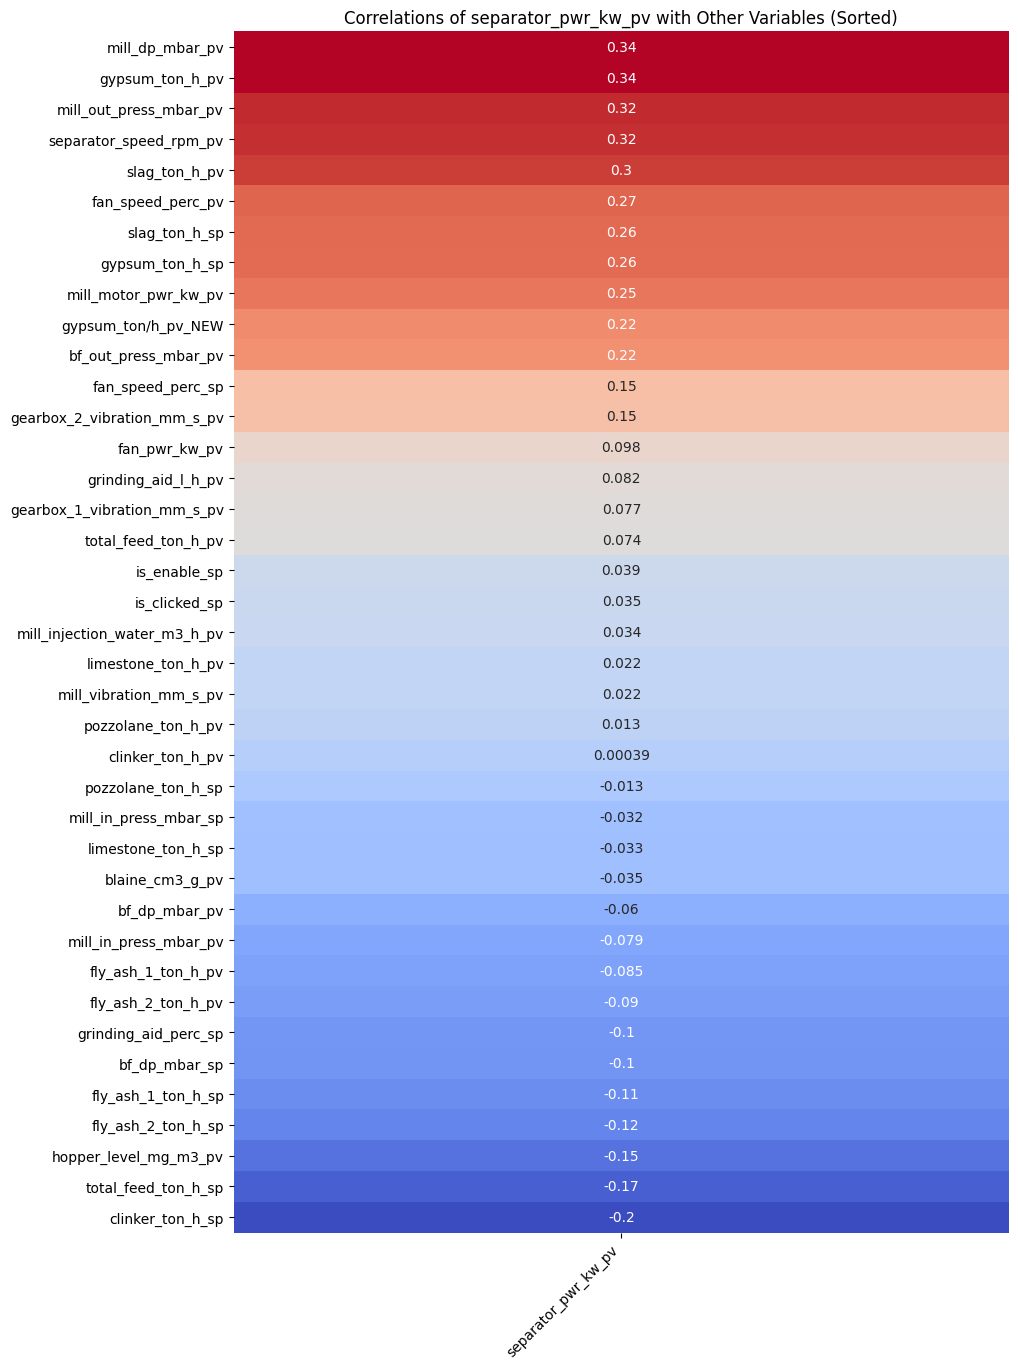

In [43]:

# Assuming you have a DataFrame named df and want to visualize the correlations of 'variable1'
variable1_correlations = df.corr()['separator_pwr_kw_pv'].drop('separator_pwr_kw_pv')

# Sort correlations in descending order
sorted_correlations = variable1_correlations.sort_values(ascending=False)

# Create a correlation matrix heatmap
correlation_matrix = pd.DataFrame(sorted_correlations)
plt.figure(figsize=(10, len(correlation_matrix)*0.4))  # Adjust the figsize
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", cbar=False)
plt.title("Correlations of separator_pwr_kw_pv with Other Variables (Sorted)")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.show()

# Predictions LSTM

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [23]:
df = df.sort_values('date')
df = df[['date','separator_speed_rpm_pv', 'mill_dp_mbar_pv', 'separator_pwr_kw_pv']]
df = df.replace('ERROR', np.nan)  # Replace 'ERROR' with NaN or any appropriate value
df = df.dropna()  # Drop rows with missing values


In [24]:
#Scaling my data 
scaler = MinMaxScaler()
df[['separator_speed_rpm_pv', 'mill_dp_mbar_pv', 'separator_pwr_kw_pv']] = scaler.fit_transform(df[['separator_speed_rpm_pv', 'mill_dp_mbar_pv', 'separator_pwr_kw_pv']])

In [25]:
# Set the percentage of data to be used for training (e.g., 80%)
train_percentage = 0.8

# Calculate the index to split the data
train_size = int(len(df) * train_percentage)

# Split the data into training and testing sets
train_data = df[:train_size]
test_data = df[train_size:]

In [26]:
# Define the number of time steps (e.g., 10)
time_steps = 10

def create_sequences(data):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data.iloc[i:i+time_steps, 1:3].values)
        y.append(data.iloc[i+time_steps, 3])
    return np.array(X), np.array(y)

# Create sequences for training and testing data
X_train, y_train = create_sequences(train_data)
X_test, y_test = create_sequences(test_data)

def create_sequences(data):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data.iloc[i:i+time_steps, 1:3].values)
        y.append(data.iloc[i+time_steps, 3])
    return np.array(X), np.array(y).astype(np.float32)

X_train, y_train = create_sequences(train_data)
X_test, y_test = create_sequences(test_data)

In [27]:
# Define the model architecture
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(time_steps, 2)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
6064/6064 [==============================] - 27s 4ms/step - loss: 4.1890e-04
Epoch 2/10
6064/6064 [==============================] - 26s 4ms/step - loss: 4.0067e-04
Epoch 3/10
6064/6064 [==============================] - 26s 4ms/step - loss: 3.9716e-04
Epoch 4/10
6064/6064 [==============================] - 26s 4ms/step - loss: 3.9517e-04
Epoch 5/10
6064/6064 [==============================] - 27s 4ms/step - loss: 3.9404e-04
Epoch 6/10
6064/6064 [==============================] - 27s 4ms/step - loss: 3.9351e-04
Epoch 7/10
6064/6064 [==============================] - 27s 4ms/step - loss: 3.9163e-04
Epoch 8/10
6064/6064 [==============================] - 28s 5ms/step - loss: 3.9101e-04
Epoch 9/10
6064/6064 [==============================] - 27s 5ms/step - loss: 3.9070e-04
Epoch 10/10
6064/6064 [==============================] - 28s 5ms/step - loss: 3.9014e-04


In [28]:
# Evaluate the model on the testing data
loss = model.evaluate(X_test, y_test)

# Make predictions on the testing data
predictions = model.predict(X_test)

# Rescale the original target values
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(np.concatenate((np.zeros((y_test.shape[0], 2)), y_test), axis=1))[:, -1]

# Rescale the predicted values
predictions = predictions.reshape(-1, 1)
predictions = scaler.inverse_transform(np.concatenate((np.zeros((predictions.shape[0], 2)), predictions), axis=1))[:, -1]

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, predictions)

# Calculate R^2
r2 = r2_score(y_test, predictions)

print('RMSE:', rmse)
print('MAPE:', mape)
print('R^2:', r2)

1516/1516 [==============================] - 4s 2ms/step
RMSE: 1.293623388300506
MAPE: 0.013844766893450296
R^2: 0.23076261858913982


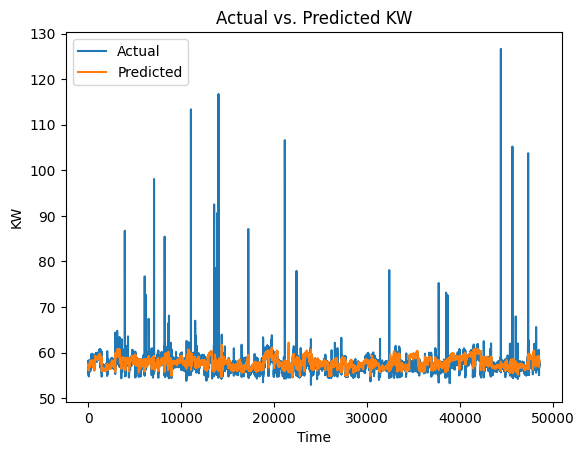

In [29]:
import matplotlib.pyplot as plt

# Plotting the actual prices
plt.plot(y_test, label='Actual')

# Plotting the predicted prices
plt.plot(predictions, label='Predicted')

plt.xlabel('Time')
plt.ylabel('KW')
plt.title('Actual vs. Predicted KW')
plt.legend()
plt.show()

# LSTM with cement type as external factor

In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [36]:
df = df.sort_values('date')
df = df[['date','separator_speed_rpm_pv', 'mill_dp_mbar_pv', 'cement_type_cpii_bool_pv','separator_pwr_kw_pv']]
df = df.replace('ERROR', np.nan)  # Replace 'ERROR' with NaN or any appropriate value
df = df.dropna()  # Drop rows with missing values

# Convert the boolean feature to integer (0 or 1)
df['cement_type_cpii_bool_pv'] = df['cement_type_cpii_bool_pv'].astype(float)

# Normalize the input features using MinMaxScaler
scaler = MinMaxScaler()
df[['separator_speed_rpm_pv', 'mill_dp_mbar_pv','cement_type_cpii_bool_pv', 'separator_pwr_kw_pv']] = scaler.fit_transform(df[['separator_speed_rpm_pv', 'mill_dp_mbar_pv', 'cement_type_cpii_bool_pv','separator_pwr_kw_pv']])

In [37]:
# Set the percentage of data to be used for training (e.g., 80%)
train_percentage = 0.8

# Calculate the index to split the data
train_size = int(len(df) * train_percentage)

# Split the data into training and testing sets
train_data = df[:train_size]
test_data = df[train_size:]

In [38]:
# Define the number of time steps (e.g., 10)
time_steps = 10
def create_sequences(data):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data.iloc[i:i+time_steps, 1:4].values)  # Adjust the range of columns based on your data
        y.append(data.iloc[i+time_steps, 4])
    return np.array(X), np.array(y).astype(np.float32)

In [39]:
X_train, y_train = create_sequences(train_data)
X_test, y_test = create_sequences(test_data)


model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(time_steps, 3)))  # Adjust the input shape based on the number of features
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
6064/6064 [==============================] - 27s 4ms/step - loss: 4.2604e-04
Epoch 2/10
6064/6064 [==============================] - 26s 4ms/step - loss: 4.0433e-04
Epoch 3/10
6064/6064 [==============================] - 26s 4ms/step - loss: 3.9869e-04
Epoch 4/10
6064/6064 [==============================] - 27s 5ms/step - loss: 3.9652e-04
Epoch 5/10
6064/6064 [==============================] - 28s 5ms/step - loss: 3.9564e-04
Epoch 6/10
6064/6064 [==============================] - 28s 5ms/step - loss: 3.9355e-04
Epoch 7/10
6064/6064 [==============================] - 28s 5ms/step - loss: 3.9200e-04
Epoch 8/10
6064/6064 [==============================] - 28s 5ms/step - loss: 3.9147e-04
Epoch 9/10
6064/6064 [==============================] - 28s 5ms/step - loss: 3.9029e-04
Epoch 10/10
6064/6064 [==============================] - 28s 5ms/step - loss: 3.9007e-04


In [40]:
# Evaluate the model on the testing data
loss = model.evaluate(X_test, y_test)

# Make predictions on the testing data
predictions = model.predict(X_test)

# Rescale the original target values
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(np.concatenate((np.zeros((y_test.shape[0], 3)), y_test), axis=1))[:, -1]
# y_test_rescaled = scaler.inverse_transform(y_test)

# Rescale the predicted values
predictions = predictions.reshape(-1, 1)
predictions = scaler.inverse_transform(np.concatenate((np.zeros((predictions.shape[0], 3)), predictions), axis=1))[:, -1]
# predictions_rescaled = scaler.inverse_transform(predictions)

1516/1516 [==============================] - 4s 2ms/step


In [41]:
y_test.shape
X_train[10000,:,0]
X_train[:,:,0].max()

1.0

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score, mean_absolute_error
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, predictions)

# Calculate R^2
r2 = r2_score(y_test, predictions)

MAE = mean_absolute_error(y_test, predictions)

print('RMSE:', rmse)
print('MAPE:', mape)
print('R^2:', r2)
print("MAE:", MAE)

RMSE: 1.2835073193503366
MAPE: 0.013588180355222981
R^2: 0.24276864800285214
MAE: 0.785710703237164


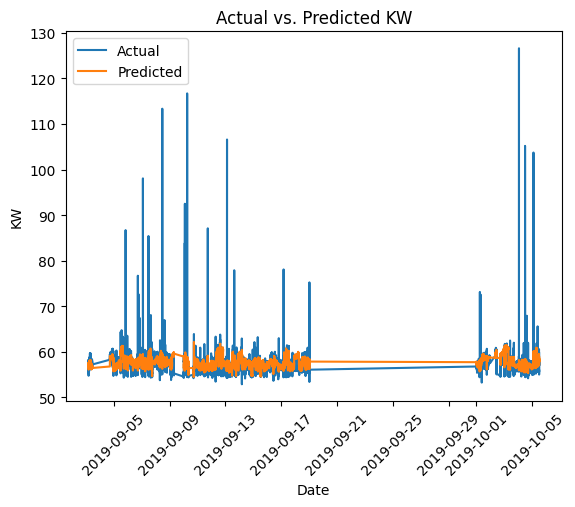

In [43]:
import matplotlib.pyplot as plt

# Create a range of dates for plotting
dates = test_data['date'].iloc[time_steps:].values

# Plotting the actual prices
plt.plot(dates, y_test, label='Actual')

# Plotting the predicted prices
plt.plot(dates, predictions, label='Predicted')

plt.xlabel('Date')
plt.ylabel('KW')
plt.title('Actual vs. Predicted KW')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# LSTM ADD gypsum_ton_h_pv

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [27]:
df = df.sort_values('date')
df = df[['date','separator_speed_rpm_pv', 'mill_dp_mbar_pv', 'cement_type_cpii_bool_pv','gypsum_ton/h_pv_NEW', 'separator_pwr_kw_pv']]
df = df.replace('ERROR', np.nan)  # Replace 'ERROR' with NaN or any appropriate value
df = df.dropna()  # Drop rows with missing values

# Convert the boolean feature to integer (0 or 1)
df['cement_type_cpii_bool_pv'] = df['cement_type_cpii_bool_pv'].astype(float)

# Normalize the input features using MinMaxScaler
scaler = MinMaxScaler()
df[['separator_speed_rpm_pv', 'mill_dp_mbar_pv', 'cement_type_cpii_bool_pv','gypsum_ton/h_pv_NEW','separator_pwr_kw_pv']] = scaler.fit_transform(df[['separator_speed_rpm_pv', 'mill_dp_mbar_pv', 'cement_type_cpii_bool_pv','separator_pwr_kw_pv','separator_pwr_kw_pv']])

In [28]:
# Set the percentage of data to be used for training (e.g., 80%)
train_percentage = 0.8

# Calculate the index to split the data
train_size = int(len(df) * train_percentage)

# Split the data into training and testing sets
train_data = df[:train_size]
test_data = df[train_size:]

In [29]:
# Set the percentage of data to be used for training (e.g., 80%)
train_percentage = 0.8

# Calculate the index to split the data
train_size = int(len(df) * train_percentage)

# Split the data into training and testing sets
train_data = df[:train_size]
test_data = df[train_size:]# Define the number of time steps (e.g., 10)
time_steps = 10
def create_sequences(data):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data.iloc[i:i+time_steps, 1:5].values)  # Adjust the range of columns based on your data
        y.append(data.iloc[i+time_steps, 5])
    return np.array(X), np.array(y).astype(np.float32)

In [30]:
X_train, y_train = create_sequences(train_data)
X_test, y_test = create_sequences(test_data)


model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(time_steps, 4)))  # Adjust the input shape based on the number of features
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
6064/6064 [==============================] - 28s 4ms/step - loss: 3.3121e-04
Epoch 2/10
6064/6064 [==============================] - 27s 4ms/step - loss: 3.1398e-04
Epoch 3/10
6064/6064 [==============================] - 28s 5ms/step - loss: 3.1152e-04
Epoch 4/10
6064/6064 [==============================] - 29s 5ms/step - loss: 3.1046e-04
Epoch 5/10
6064/6064 [==============================] - 29s 5ms/step - loss: 3.0957e-04
Epoch 6/10
6064/6064 [==============================] - 29s 5ms/step - loss: 3.0885e-04
Epoch 7/10
6064/6064 [==============================] - 29s 5ms/step - loss: 3.0852e-04
Epoch 8/10
6064/6064 [==============================] - 29s 5ms/step - loss: 3.0775e-04
Epoch 9/10
6064/6064 [==============================] - 29s 5ms/step - loss: 3.0693e-04
Epoch 10/10
6064/6064 [==============================] - 29s 5ms/step - loss: 3.0745e-04


In [31]:
# Evaluate the model on the testing data
loss = model.evaluate(X_test, y_test)

# Make predictions on the testing data
predictions = model.predict(X_test)

# Rescale the original target values
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(np.concatenate((np.zeros((y_test.shape[0], 4)), y_test), axis=1))[:, -1]
# y_test_rescaled = scaler.inverse_transform(y_test)

# Rescale the predicted values
predictions = predictions.reshape(-1, 1)
predictions = scaler.inverse_transform(np.concatenate((np.zeros((predictions.shape[0], 4)), predictions), axis=1))[:, -1]
# predictions_rescaled = scaler.inverse_transform(predictions)

1516/1516 [==============================] - 4s 2ms/step


In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score, mean_absolute_error
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, predictions)

# Calculate R^2
r2 = r2_score(y_test, predictions)

MAE = mean_absolute_error(y_test, predictions)

print('RMSE:', rmse)
print('MAPE:', mape)
print('R^2:', r2)
print("MAE:", MAE)

RMSE: 0.9496903702119561
MAPE: 0.006593548770484016
R^2: 0.5854318282363198
MAE: 0.3852824245345875


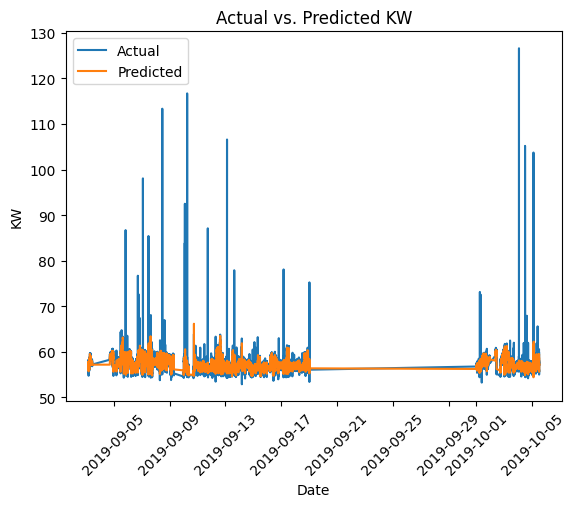

In [33]:
import matplotlib.pyplot as plt

# Create a range of dates for plotting
dates = test_data['date'].iloc[time_steps:].values

# Plotting the actual prices
plt.plot(dates, y_test, label='Actual')

# Plotting the predicted prices
plt.plot(dates, predictions, label='Predicted')

plt.xlabel('Date')
plt.ylabel('KW')
plt.title('Actual vs. Predicted KW')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Random Forest

In [38]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score, mean_absolute_error

In [39]:
df = df.sort_values('date')
df = df[['date','separator_speed_rpm_pv', 'mill_dp_mbar_pv', 'cement_type_cpii_bool_pv','gypsum_ton/h_pv_NEW', 'separator_pwr_kw_pv']]
df = df.replace('ERROR', np.nan)  # Replace 'ERROR' with NaN or any appropriate value
df = df.dropna()  # Drop rows with missing values
X = df[['separator_speed_rpm_pv', 'mill_dp_mbar_pv', 'cement_type_cpii_bool_pv','gypsum_ton/h_pv_NEW']]
y = df['separator_pwr_kw_pv']

# Convert the boolean feature to integer (0 or 1)
df['cement_type_cpii_bool_pv'] = df['cement_type_cpii_bool_pv'].astype(float)
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Specify the number of splits for cross-validation (e.g., 5)
n_splits = 5

# Define the time series cross-validation splitter
tscv = TimeSeriesSplit(n_splits=n_splits)


In [42]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('rf', RandomForestRegressor())
])

param_grid = {
    'rf__n_estimators': [50, 100, 150],  # Specify the values to be tested
    'rf__max_depth': [None, 5, 10]}  # Example: test None, 5, and 10


# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=4, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)


# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'rf__max_depth': 5, 'rf__n_estimators': 50}


In [44]:
# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)

# Calculate R^2
r2 = r2_score(y_test, y_pred)

MAE = mean_absolute_error(y_test, y_pred)

print('RMSE:', rmse)
print('MAPE:', mape)
print('R^2:', r2)
print('MAE:', MAE)

RMSE: 1.2875514787091336
MAPE: 0.013742847013407082
R^2: 0.23784523623367693
MAE: 0.7971659297353191


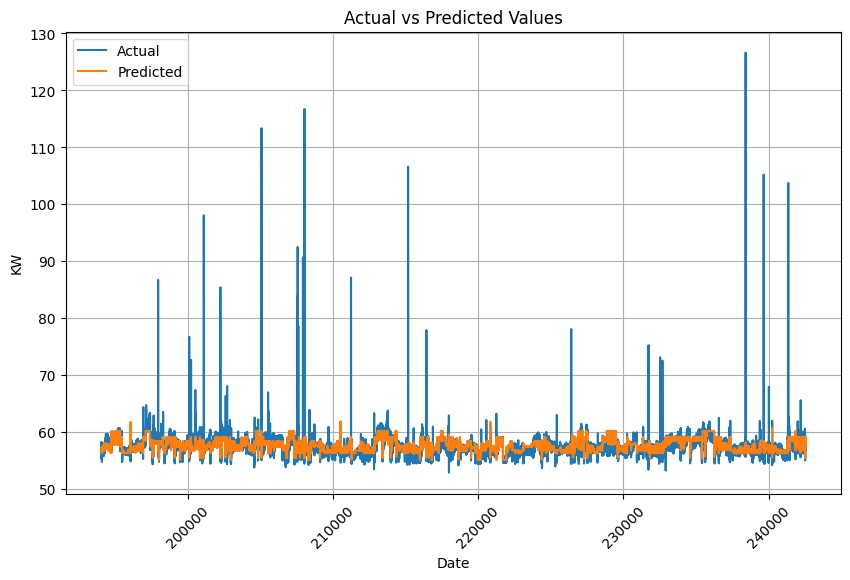

In [45]:
# Plotting the actual and predicted values without the gap

# Create a range of dates for plotting
dates = y_test.index

plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(dates, y_test, label='Actual')
plt.plot(dates, y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('KW')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Plotting the actual and predicted values without the gap

# Create a range of dates for plotting
dates = y_test.index

plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(dates, y_test, label='Actual')
plt.plot(dates, y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('KW')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# TASK 2

In [58]:
# print(df['gypsum_ton/h_pv'].isnull().sum())
# print(df['gypsum_ton_h_pv'].isnull().sum())

## Proving that they have nan values in 8 same rows

result1 = df[df['gypsum_ton/h_pv'].isnull() & df['gypsum_ton_h_pv'].isnull()]
result1

# Checking if they are rows that have a non-Nan value in the same rows
result2 = df[df['gypsum_ton/h_pv'].notnull() & df['gypsum_ton_h_pv'].notnull()].all(axis=1)
result2

# Combined Columns
df['gypsum_ton/h_pv_NEW'] = df['gypsum_ton/h_pv'].fillna(df['gypsum_ton_h_pv'])

df['gypsum_ton/h_pv_NEW'].isna().sum()
#Filling the Nan values
df['gypsum_ton/h_pv_NEW'] = pd.to_numeric(df['gypsum_ton/h_pv_NEW'])

df['gypsum_ton/h_pv_NEW'] = df['gypsum_ton/h_pv_NEW'].fillna((df['gypsum_ton/h_pv_NEW'].shift() + df['gypsum_ton/h_pv_NEW'].shift(-1)) / 2)
print(df['gypsum_ton/h_pv_NEW'].isna().sum())


# print(df['total_feed_ton/h_sp'].isnull().sum())
# print(df['total_feed_ton_h_sp'].isnull().sum())

## Proving that they have nan values in 6 same rows

result1 = df[df['total_feed_ton/h_sp'].isnull() & df['total_feed_ton_h_sp'].isnull()]
result1

# Checking if they are rows that have a non-Nan value in the same rows
result2 = df[df['total_feed_ton/h_sp'].notnull() & df['total_feed_ton_h_sp'].notnull()].all(axis=1)
result2

# Combined Columns
df['total_feed_ton/h_sp_NEW'] = df['total_feed_ton/h_sp'].fillna(df['total_feed_ton_h_sp'])

df['total_feed_ton/h_sp_NEW'].isna().sum()
#removing the Nan values
df['total_feed_ton/h_sp_NEW'] = pd.to_numeric(df['total_feed_ton/h_sp_NEW'])

df['total_feed_ton/h_sp_NEW'] = df['total_feed_ton/h_sp_NEW'].fillna((df['total_feed_ton/h_sp_NEW'].shift() + df['total_feed_ton/h_sp_NEW'].shift(-1)) / 2)
print(df['total_feed_ton/h_sp_NEW'].isna().sum())

# print(df['fly_ash_1_ton/h_pv'].isnull().sum())
# print(df['fly_ash_1_ton_h_pv'].isnull().sum())

## Proving that they have nan values in 3 same rows

result1 = df[df['fly_ash_1_ton/h_pv'].isnull() & df['fly_ash_1_ton_h_pv'].isnull()]
result1

# Checking if they are rows that have a non-Nan value in the same rows
result2 = df[df['fly_ash_1_ton/h_pv'].notnull() & df['fly_ash_1_ton_h_pv'].notnull()].all(axis=1)
result2

# Combined Columns
df['fly_ash_1_ton/h_pv_NEW'] = df['fly_ash_1_ton/h_pv'].fillna(df['fly_ash_1_ton_h_pv'])
df['fly_ash_1_ton/h_pv_NEW'].isna().sum()

#removing the Nan values
df['fly_ash_1_ton/h_pv_NEW'] = pd.to_numeric(df['fly_ash_1_ton/h_pv_NEW'])
df['fly_ash_1_ton/h_pv_NEW'] = df['fly_ash_1_ton/h_pv_NEW'].fillna((df['fly_ash_1_ton/h_pv_NEW'].shift() + df['fly_ash_1_ton/h_pv_NEW'].shift(-1)) / 2)
df['fly_ash_1_ton/h_pv_NEW'].isna().sum()

# print(df['fly_ash_1_ton/h_sp'].isnull().sum())
# print(df['fly_ash_1_ton_h_sp'].isnull().sum())

## Proving that they have nan values in 3 same rows

result1 = df[df['fly_ash_1_ton/h_sp'].isnull() & df['fly_ash_1_ton/h_sp'].isnull()]
result1

# Checking if they are rows that have a non-Nan value in the same rows
result2 = df[df['fly_ash_1_ton/h_sp'].notnull() & df['fly_ash_1_ton_h_sp'].notnull()].all(axis=1)
result2

# Combined Columns
df['fly_ash_1_ton/h_sp_NEW'] = df['fly_ash_1_ton/h_sp'].fillna(df['fly_ash_1_ton_h_sp'])
df['fly_ash_1_ton/h_sp_NEW'].isna().sum()

#filling the Nan values
df['fly_ash_1_ton/h_sp_NEW'] = pd.to_numeric(df['fly_ash_1_ton/h_sp_NEW'])
df['fly_ash_1_ton/h_sp_NEW'] = df['fly_ash_1_ton/h_sp_NEW'].fillna((df['fly_ash_1_ton/h_sp_NEW'].shift() + df['fly_ash_1_ton/h_sp_NEW'].shift(-1)) / 2)
df['fly_ash_1_ton/h_sp_NEW'].isna().sum()

# print(df['fly_ash_2_ton/h_pv'].isnull().sum())
# print(df['fly_ash_2_ton_h_pv'].isnull().sum())

## Proving that they have nan values in 3 same rows

result1 = df[df['fly_ash_2_ton/h_pv'].isnull() & df['fly_ash_2_ton_h_pv'].isnull()]
result1

# Checking if they are rows that have a non-Nan value in the same rows
result2 = df[df['fly_ash_2_ton/h_pv'].notnull() & df['fly_ash_2_ton_h_pv'].notnull()].all(axis=1)
result2

# Combined Columns
df['fly_ash_2_ton/h_pv_NEW'] = df['fly_ash_2_ton/h_pv'].fillna(df['fly_ash_2_ton_h_pv'])
df['fly_ash_2_ton/h_pv_NEW'].isna().sum()

#filling the Nan values
df['fly_ash_2_ton/h_pv_NEW'] = pd.to_numeric(df['fly_ash_2_ton/h_pv_NEW'])
df['fly_ash_2_ton/h_pv_NEW'] = df['fly_ash_2_ton/h_pv_NEW'].fillna((df['fly_ash_2_ton/h_pv_NEW'].shift() + df['fly_ash_2_ton/h_pv_NEW'].shift(-1)) / 2)
df['fly_ash_2_ton/h_pv_NEW'].isna().sum()


# print(df['fly_ash_2_ton/h_sp'].isnull().sum())
# print(df['fly_ash_2_ton_h_sp'].isnull().sum())

## Proving that they have nan values in 3 same rows

result1 = df[df['fly_ash_2_ton/h_sp'].isnull() & df['fly_ash_2_ton_h_sp'].isnull()]
result1

# Checking if they are rows that have a non-Nan value in the same rows
result2 = df[df['fly_ash_2_ton/h_sp'].notnull() & df['fly_ash_2_ton_h_sp'].notnull()].all(axis=1)
result2

# Combined Columns
df['fly_ash_2_ton/h_sp_NEW'] = df['fly_ash_2_ton/h_sp'].fillna(df['fly_ash_2_ton_h_sp'])
df['fly_ash_2_ton/h_sp_NEW'].isna().sum()

#filling the Nan values
df['fly_ash_2_ton/h_sp_NEW'] = pd.to_numeric(df['fly_ash_2_ton/h_sp_NEW'])
df['fly_ash_2_ton/h_sp_NEW'] = df['fly_ash_2_ton/h_sp_NEW'].fillna((df['fly_ash_2_ton/h_sp_NEW'].shift() + df['fly_ash_2_ton/h_sp_NEW'].shift(-1)) / 2)
df['fly_ash_2_ton/h_sp_NEW'].isna().sum()

# print(df['mill_injection_water_m3/h_pv'].isnull().sum())
# print(df['mill_injection_water_m3_h_pv'].isnull().sum())

## Proving that they have nan values in 15 same rows

result1 = df[df['mill_injection_water_m3/h_pv'].isnull() & df['mill_injection_water_m3_h_pv'].isnull()]
result1

# Checking if they are rows that have a non-Nan value in the same rows
result2 = df[df['mill_injection_water_m3/h_pv'].notnull() & df['mill_injection_water_m3_h_pv'].notnull()].all(axis=1)
result2

# Combined Columns
df['mill_injection_water_m3/h_pv_NEW'] = df['mill_injection_water_m3/h_pv'].fillna(df['mill_injection_water_m3_h_pv'])
df['mill_injection_water_m3/h_pv_NEW'].isna().sum()

#filling the Nan values
df['mill_injection_water_m3/h_pv_NEW'] = pd.to_numeric(df['mill_injection_water_m3/h_pv_NEW'])

df['mill_injection_water_m3/h_pv_NEW'] = df['mill_injection_water_m3/h_pv_NEW'].fillna((df['mill_injection_water_m3/h_pv_NEW'].shift() + df['mill_injection_water_m3/h_pv_NEW'].shift(-1)) / 2)
print(df['mill_injection_water_m3/h_pv_NEW'].isna().sum())


# print(df['total_feed_ton/h_pv'].isnull().sum())
# print(df['total_feed_ton_h_pv'].isnull().sum())

## Proving that they have nan values in 3 same rows

result1 = df[df['total_feed_ton/h_pv'].isnull() & df['total_feed_ton_h_pv'].isnull()]
result1

# Checking if they are rows that have a non-Nan value in the same rows
result2 = df[df['total_feed_ton/h_pv'].notnull() & df['total_feed_ton_h_pv'].notnull()].all(axis=1)
result2

# Combined Columns
df['total_feed_ton/h_pv_NEW'] = df['total_feed_ton/h_pv'].fillna(df['total_feed_ton_h_pv'])
df['total_feed_ton/h_pv_NEW'].isna().sum()

#removing the Nan values
df['total_feed_ton/h_pv_NEW'] = pd.to_numeric(df['total_feed_ton/h_pv_NEW'])
df['total_feed_ton/h_pv_NEW'] = df['total_feed_ton/h_pv_NEW'].fillna((df['total_feed_ton/h_pv_NEW'].shift() + df['total_feed_ton/h_pv_NEW'].shift(-1)) / 2)
df['total_feed_ton/h_pv_NEW'].isna().sum()

0
0
0


0

In [59]:
df2 = df[['date','total_feed_ton/h_pv_NEW','mill_injection_water_m3/h_pv_NEW','fly_ash_2_ton/h_pv_NEW','fly_ash_1_ton/h_pv_NEW','bucket_elv_mtr_pwr_kw_pv','grinding_pressure_bar_pv','separator_speed_rpm_pv','main_fan_speed_rpm_pv','mill_dp_mbar_pv']]
df2

,date,total_feed_ton/h_pv_NEW,mill_injection_water_m3/h_pv_NEW,fly_ash_2_ton/h_pv_NEW,fly_ash_1_ton/h_pv_NEW,bucket_elv_mtr_pwr_kw_pv,grinding_pressure_bar_pv,separator_speed_rpm_pv,main_fan_speed_rpm_pv,mill_dp_mbar_pv
0,2019-05-10 11:07:30,85.82,2.69,0.03,26.65,4.88,115.0,747.14,928.2,31.17
1,2019-05-10 11:12:00,85.50,2.69,0.08,26.34,4.83,116.0,746.87,928.2,31.37
2,2019-05-10 11:24:00,57.92,2.45,0.10,0.01,4.82,123.0,717.51,928.2,29.79
3,2019-05-10 11:24:30,57.72,2.46,0.04,0.00,4.85,120.0,735.89,928.2,30.51
4,2019-05-10 11:25:00,58.01,2.46,0.07,0.01,4.88,118.0,736.68,928.2,31.61
...,...,...,...,...,...,...,...,...,...,...
242545,2019-10-05 11:56:00,65.93,1.64,0.08,0.02,4.82,112.0,767.68,NaN,32.83
242546,2019-10-05 11:56:30,65.48,1.63,0.09,0.06,4.87,111.0,768.10,NaN,32.91
242547,2019-10-05 11:57:00,65.68,1.63,0.06,0.01,4.82,110.0,769.11,NaN,33.65
242548,2019-10-05 11:57:30,65.33,1.63,0.11,0.01,4.81,108.0,769.27,NaN,35.03


In [60]:
df2.isna().sum()

date                                     0
total_feed_ton/h_pv_NEW                  0
mill_injection_water_m3/h_pv_NEW         0
fly_ash_2_ton/h_pv_NEW                   0
fly_ash_1_ton/h_pv_NEW                   0
bucket_elv_mtr_pwr_kw_pv                 7
grinding_pressure_bar_pv                 9
separator_speed_rpm_pv                   0
main_fan_speed_rpm_pv               180475
mill_dp_mbar_pv                          0
dtype: int64

In [61]:
# df['main_fan_speed_rpm_pv'] = df['main_fan_speed_rpm_pv'].astype(float)
df['main_fan_speed_rpm_pv'] = df['main_fan_speed_rpm_pv'].str.replace(',', '')  # Remove commas
df['main_fan_speed_rpm_pv'] = pd.to_numeric(df['main_fan_speed_rpm_pv'], errors='coerce')
df['main_fan_speed_rpm_pv'].describe()

count    23620.000000
mean       909.428053
std        132.517599
min        357.000000
25%        933.337500
50%        940.100000
75%        952.000000
max       1056.070000
Name: main_fan_speed_rpm_pv, dtype: float64

<AxesSubplot: >

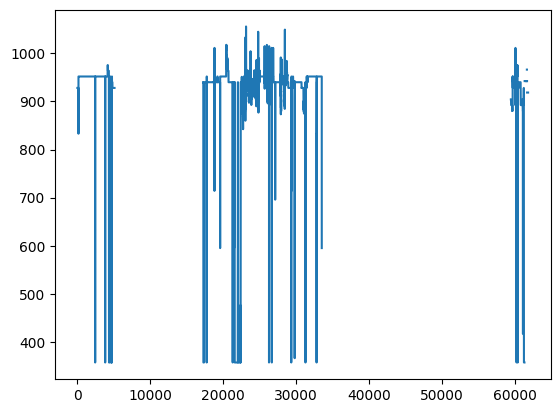

In [41]:
df['main_fan_speed_rpm_pv'].plot()

In [62]:
df2['bucket_elv_mtr_pwr_kw_pv'] =  pd.to_numeric(df['bucket_elv_mtr_pwr_kw_pv'], errors='coerce')

In [63]:
df2['bucket_elv_mtr_pwr_kw_pv'] = df2['bucket_elv_mtr_pwr_kw_pv'].fillna((df2['bucket_elv_mtr_pwr_kw_pv'].shift() + df2['bucket_elv_mtr_pwr_kw_pv'].shift(-1)) / 2)
df2['bucket_elv_mtr_pwr_kw_pv'].isna().sum()

0

In [64]:
df2['grinding_pressure_bar_pv'] =  pd.to_numeric(df['grinding_pressure_bar_pv'], errors='coerce')
df2['grinding_pressure_bar_pv'] = df2['grinding_pressure_bar_pv'].fillna((df2['grinding_pressure_bar_pv'].shift() + df2['grinding_pressure_bar_pv'].shift(-1)) / 2)
df2['grinding_pressure_bar_pv'].isna().sum()

0

<AxesSubplot: >

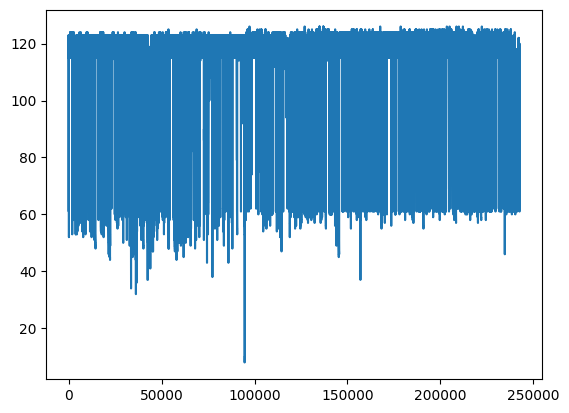

In [65]:
df2['grinding_pressure_bar_pv'].plot()

In [66]:
df2.corr()

,total_feed_ton/h_pv_NEW,mill_injection_water_m3/h_pv_NEW,fly_ash_2_ton/h_pv_NEW,fly_ash_1_ton/h_pv_NEW,bucket_elv_mtr_pwr_kw_pv,grinding_pressure_bar_pv,separator_speed_rpm_pv,mill_dp_mbar_pv
total_feed_ton/h_pv_NEW,1.000000,0.683299,0.381086,0.431296,0.455013,0.771319,0.116938,0.497346
mill_injection_water_m3/h_pv_NEW,0.683299,1.000000,0.289158,0.329236,0.300262,0.613448,0.113872,0.368801
fly_ash_2_ton/h_pv_NEW,0.381086,0.289158,1.000000,-0.324369,0.082560,0.142601,-0.102985,0.035383
fly_ash_1_ton/h_pv_NEW,0.431296,0.329236,-0.324369,1.000000,0.090519,0.159622,-0.096733,0.025437
bucket_elv_mtr_pwr_kw_pv,0.455013,0.300262,0.082560,0.090519,1.000000,0.467317,0.021118,0.314554
grinding_pressure_bar_pv,0.771319,0.613448,0.142601,0.159622,0.467317,1.000000,0.349876,0.613915
separator_speed_rpm_pv,0.116938,0.113872,-0.102985,-0.096733,0.021118,0.349876,1.000000,0.263095
mill_dp_mbar_pv,0.497346,0.368801,0.035383,0.025437,0.314554,0.613915,0.263095,1.000000


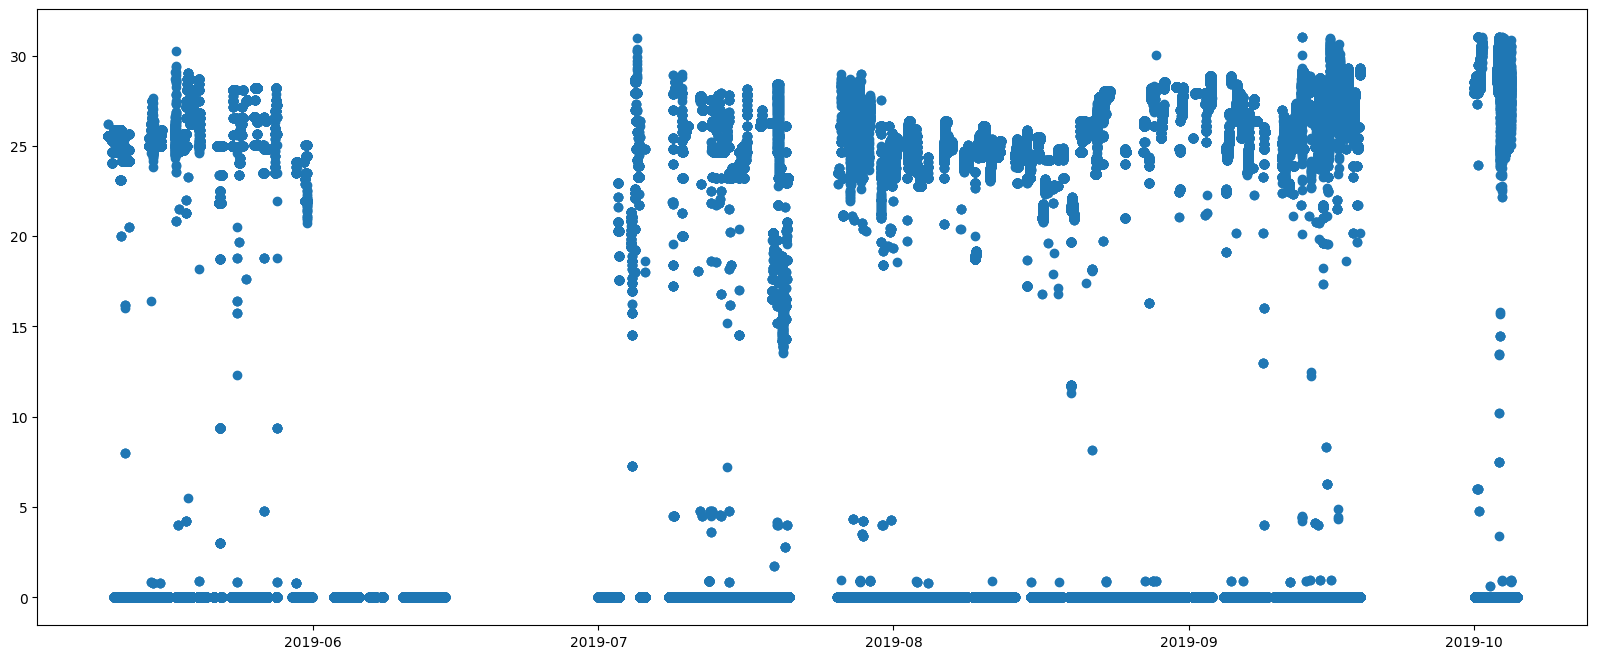

In [71]:
plt.figure(figsize=(20,8))
plt.scatter(df['date'],df['fly_ash_1_ton/h_sp_NEW'])

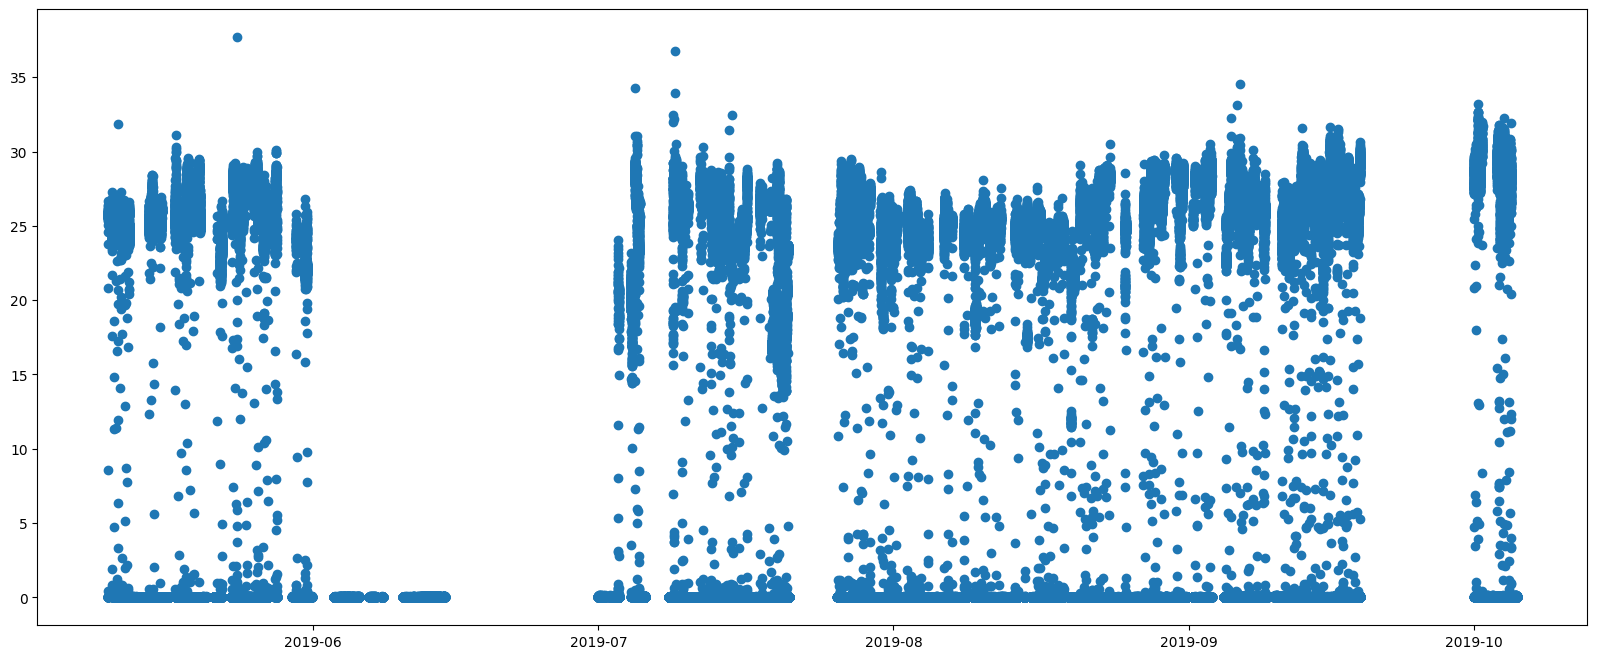

In [72]:
plt.figure(figsize=(20,8))
plt.scatter(df['date'],df['fly_ash_1_ton/h_pv_NEW'])